In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample(
    
)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28832,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

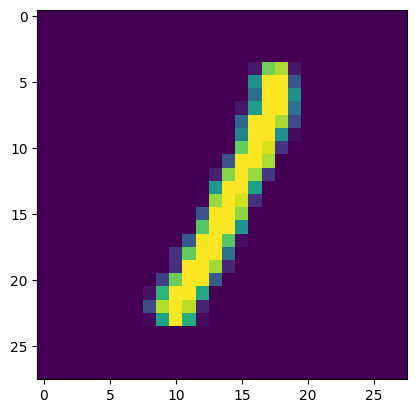

In [7]:
plt.imshow(df.iloc[16743,1:].values.reshape(28,28))

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36223,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


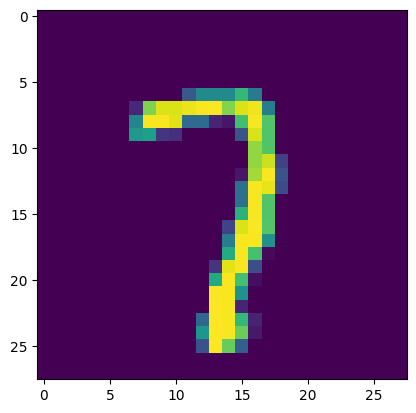

In [9]:
plt.imshow(df.iloc[10279,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:
y_predict= knn.predict(X_test)

In [19]:
y_predict

array([8, 1, 9, ..., 3, 0, 9])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score_knn =accuracy_score(y_test,y_predict)

In [21]:
accuracy_score_knn

0.9648809523809524

**Applying PCA to a dataset****

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [23]:
X_train= ss.fit_transform(X_train)
X_test= ss.fit_transform(X_test)

In [24]:
X_train.shape

(33600, 784)

**PCA implementation**# 

In [25]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=200)

In [60]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
trf_X_train = pca.fit_transform(X_train)
trf_X_test = pca.transform(X_test)

In [62]:
trf_X_train.shape

(33600, 200)

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(trf_X_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn.predict(trf_X_test)

In [66]:
accuracy_score(y_pred,y_test)

0.950952380952381

In [67]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

0.26202380952380955
0.3254761904761905
0.5097619047619047
0.6632142857142858
0.7386904761904762
0.8228571428571428
0.8444047619047619
0.871547619047619
0.8857142857142857
0.9057142857142857
0.9120238095238096
0.9166666666666666
0.9267857142857143
0.9341666666666667
0.9372619047619047
0.9365476190476191
0.9401190476190476
0.9408333333333333
0.9427380952380953
0.9446428571428571
0.9444047619047619
0.9433333333333334
0.9445238095238095
0.9442857142857143
0.9477380952380953
0.9482142857142857
0.9478571428571428
0.9470238095238095
0.9485714285714286
0.9486904761904762
0.9496428571428571
0.9497619047619048
0.95
0.9496428571428571
0.9515476190476191
0.9510714285714286
0.9523809523809523
0.9532142857142857
0.9534523809523809
0.9529761904761904
0.9523809523809523
0.9529761904761904
0.9529761904761904
0.9535714285714286
0.9527380952380953
0.9535714285714286
0.9536904761904762
0.9542857142857143
0.9546428571428571
0.9535714285714286
0.9551190476190476
0.9541666666666667
0.9545238095238096
0.95547

KeyboardInterrupt: 

In [68]:
pca = PCA(n_components =2)

In [69]:
trf_X_train = pca.fit_transform(X_train)
trf_X_test = pca.transform(X_test)

In [70]:
trf_X_train

array([[-2.71862919, -0.48945096],
       [-0.67696102, -6.7536592 ],
       [-3.03324783,  6.50624922],
       ...,
       [ 2.14883677,  0.78144557],
       [ 1.05957352,  0.94919283],
       [17.70258079,  1.96263981]])

In [76]:
import plotly.express as px
y_train_trf = y_train.astype(str)

fig = px.scatter(x = trf_X_train[:,0], y = trf_X_train[:,1], color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

**Plotting 3D grafh**

In [77]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [78]:
X_train_trf

array([[-2.71863193, -0.48997806,  1.13444127],
       [-0.67692888, -6.75438868, -2.33865862],
       [-3.03323246,  6.50999051,  7.49220365],
       ...,
       [ 2.14884052,  0.78127342, -0.74422922],
       [ 1.05954074,  0.94788634,  3.94999703],
       [17.70256619,  1.96202304, -4.94375027]])

In [79]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [80]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023389, 26.74459369])

In [81]:
pca.components_
# Eigen vectors

array([[-1.83847306e-17, -9.77054500e-19,  9.88331194e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.32987381e-16, -1.45735016e-17,  2.90877609e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.22348721e-17, -3.42441887e-17,  9.62430561e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [82]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [85]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [86]:
(pca.explained_variance_ratio_)*100


array([5.78519225, 4.14926966, 3.80423865])

**Chose Eigen Vectors whose explaning atleast 90 variance of dataset*> ***

In [87]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [88]:
pca.explained_variance_
#Eigen Values

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [89]:
pca.explained_variance_.shape


(784,)

In [90]:
pca.components_.shape
#Eigen Vectors

(784, 784)

In [91]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

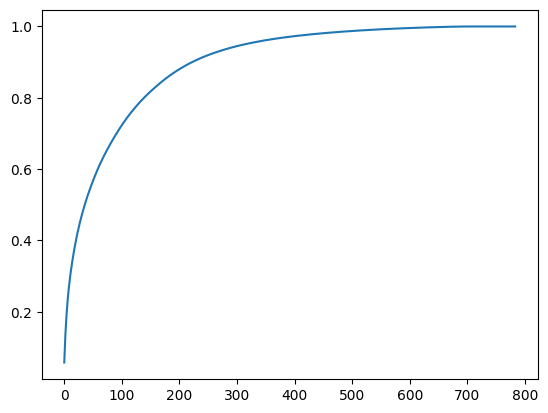

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.savefig("Eigen Vectors.png")